In [5]:
patent_dir_path = "/Users/YMacBOOKBir/Software/git/graspp-25S-innovation/data/特許件数"
randd_dir_path = "/Users/YMacBOOKBir/Software/git/graspp-25S-innovation/data/研究開発費"
labor_dir_path = "/Users/YMacBOOKBir/Software/git/graspp-25S-innovation/data/産業別、売上高経常利益率別常時従業者数"

import os
import pandas as pd
import numpy as np

In [6]:
patent_dict = {}
randd_dict = {}
labor_dict = {}

for file in os.listdir(patent_dir_path):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(patent_dir_path, file), encoding="utf-8")
        patent_dict[file.split(".")[0]] = df

for file in os.listdir(randd_dir_path):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(randd_dir_path, file), encoding="utf-8")
        randd_dict[file.split(".")[0]] = df

for file in os.listdir(labor_dir_path):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(labor_dir_path, file), encoding="utf-8")
        labor_dict[file.split(".")[0]] = df

In [7]:
from industries import id2industries_dict, get_industries_id, get_industries_name
get_industries_id("情報通信業")

'G'

### Sample Data
	産業	企業数	研究開発_売上高（百万円）	研究開発_研究開発費_計	研究開発_研究開発費_自社研究開発費（百万円）	研究開発_研究開発費_委託研究開発費（百万円）	研究開発_研究開発費_委託研究開発費（百万円）_うち、関係会社への委託_国内（百万円）	研究開発_研究開発費_委託研究開発費（百万円）_うち、関係会社への委託_海外（百万円）	研究開発_売上高研究開発費比率（％）	研究開発_受託研究費（百万円）	研究開発_受託研究費（百万円）_うち、関係会社からの受託_国内（百万円）	研究開発_受託研究費（百万円）_うち、関係会社からの受託_海外（百万円）	研究開発投資_企業数	研究開発投資_当期取得額（百万円）	能力開発_企業数	能力開発_能力開発費（百万円）
0	総合計	8068	299536235	10438431	8893697	1544734	669247	77407	3.48	418136	125969	9636	1771	476616	7645	376301
1	合計	7909	290389660	10391978	8864962	1527016	668768	77400	3.58	417167	125708	9636	1750	473123	7306	371345
2	鉱業、採石業、砂利採取業	7					470						1		9	
3	製造業	6101	209652609	9548493	8205540	1342953	648434	72595	4.55	257652	45464	1159	1518	438009	3489	289566
4	090食料品製造業	676	12609629	147598	134512	13086	1670	1965	1.17	1553	505		113	10035	354	4236
5	091畜産食料品製造業	96	3508551	28954	27888	1066	573		0.83	178			14	1758	58	867
6	092水産食料品製造業	81	714643	3527	3434	93	62		0.49	44	24		6	51	40	169
7	093精穀・製粉業	20	554448	6109	6023	86			1.1	636			5	341	11	150
8	099その他の食料品製造業	479	7831987	109008	97167	11841	1035	1965	1.39	695	481		88	7885	245	3050

Expected df:

year    industry    industry_id company_count(企業数)   研究開発_研究開発費_計  特許権_企業数   特許権_件数_所有数  特許権_件数_所有数  実用新案権_件数_所有数  意匠権_企業数   意匠権_件数_所有数

In [8]:
rows = []
for year in randd_dict:
    randd_df = randd_dict[year]
    patent_df = patent_dict.get(year)
    if patent_df is None:
        continue

    # Standardize column names for merging
    randd_df = randd_df.rename(columns={
        "産業": "industry",
        "研究開発_研究開発費_計": "randd_total",
        "研究開発_研究開発費_計_百万円": "randd_total",
        "研究開発_売上高（百万円）": "randd_sales",
        "研究開発_売上高_百万円": "randd_sales",
        "企業数": "company_count",
        "研究開発_企業数": "company_count"
    })
    patent_df = patent_df.rename(columns={
        "産業": "industry",
        "特許権_企業数": "patent_company_count",
        "特許権_企業数_社": "patent_company_count",
        "_特許権_企業数": "patent_company_count",
        "特許権_件数_所有数": "patent_count",
        "特許権_件数_所有数_件": "patent_count",
        "_特許権_件数_所有数": "patent_count",
        "実用新案権_企業数": "utility_company_count",
        "実用新案権_企業数_社": "utility_company_count",
        "実用新案権_件数_所有数": "utility_count",
        "実用新案権_件数_所有数_件": "utility_count",
        "意匠権_企業数": "design_company_count",
        "意匠権_企業数_社": "design_company_count",
        "意匠権_件数_所有数": "design_count",
        "意匠権_件数_所有数_件": "design_count"
    })

    # Merge on industry name
    merged = pd.merge(randd_df, patent_df, on="industry", how="inner")

    for _, row in merged.iterrows():
        industry_id = get_industries_id(row["industry"])
        industry_name = get_industries_name(industry_id)
        rows.append({
            "year": year,
            "industry": industry_name,
            "industry_id": industry_id,
            "企業数": row.get("company_count"),
            "研究開発_売上高_百万円": row.get("randd_sales"),
            "研究開発_研究開発費_計": row.get("randd_total"),
            "特許権_企業数": row.get("patent_company_count"),
            "特許権_件数_所有数": row.get("patent_count"),
            "実用新案権_企業数": row.get("utility_company_count"),
            "実用新案権_件数_所有数": row.get("utility_count"),
            "意匠権_企業数": row.get("design_company_count"),
            "意匠権_件数_所有数": row.get("design_count"),
        })

expected_df = pd.DataFrame(rows, columns=[
    "year", "industry", "industry_id", "企業数", "研究開発_売上高_百万円",
    "研究開発_研究開発費_計", "特許権_企業数", "特許権_件数_所有数", "実用新案権_企業数",
    "実用新案権_件数_所有数", "意匠権_企業数", "意匠権_件数_所有数"
])




In [9]:
expected_df

,year,industry,industry_id,企業数,研究開発_売上高_百万円,研究開発_研究開発費_計,特許権_企業数,特許権_件数_所有数,実用新案権_企業数,実用新案権_件数_所有数,意匠権_企業数,意匠権_件数_所有数
0,2020,合計,000,8450,373249339,15159301,6997.0,1649632.0,2177.0,18752.0,3593.0,182291.0
1,2020,合計,000,8246,361803716,14984524,6764.0,1595932.0,2103.0,18336.0,3483.0,177005.0
2,2020,鉱業、採石業、砂利採取業,C,7,34997,377,6.0,40.0,NaN,NaN,NaN,NaN
3,2020,製造業,E,6086,234557073,11922450,4973.0,1355877.0,1584.0,14906.0,2554.0,151710.0
4,2020,食料品製造業,090,690,14479104,137901,306.0,10340.0,54.0,153.0,158.0,1753.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2177,2011,ディスプレイ業,927,6.0,81752.0,154.0,3.0,NaN,2.0,NaN,2.0,NaN
2178,2011,テレマーケティング業,928,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2179,2011,その他の事業サービス業,929,35.0,NaN,NaN,32.0,434.0,9.0,25.0,12.0,30.0
2180,2011,サービス業（その他のサービス業）,R2,36.0,914601.0,16500.0,47.0,1407.0,23.0,98.0,35.0,265.0


In [10]:
#export to csv
expected_df.to_csv("パネルデータ.csv", index=False, encoding="utf-8-sig")

In [11]:
expected_df.columns = [
    "year", "industry", "industry_id", "company_count", "randd_sales",
    "randd_total", "patent_company_count", "patent_count",
    "utility_company_count", "utility_count", "design_company_count",
    "design_count"
]

In [12]:
expected_df.to_csv("panel_data.csv", index=False, encoding="utf-8-sig")

/var/folders/mg/521vfw7n2k7cprryb8bjqhfc0000gn/T/ipykernel_80131/3326503292.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


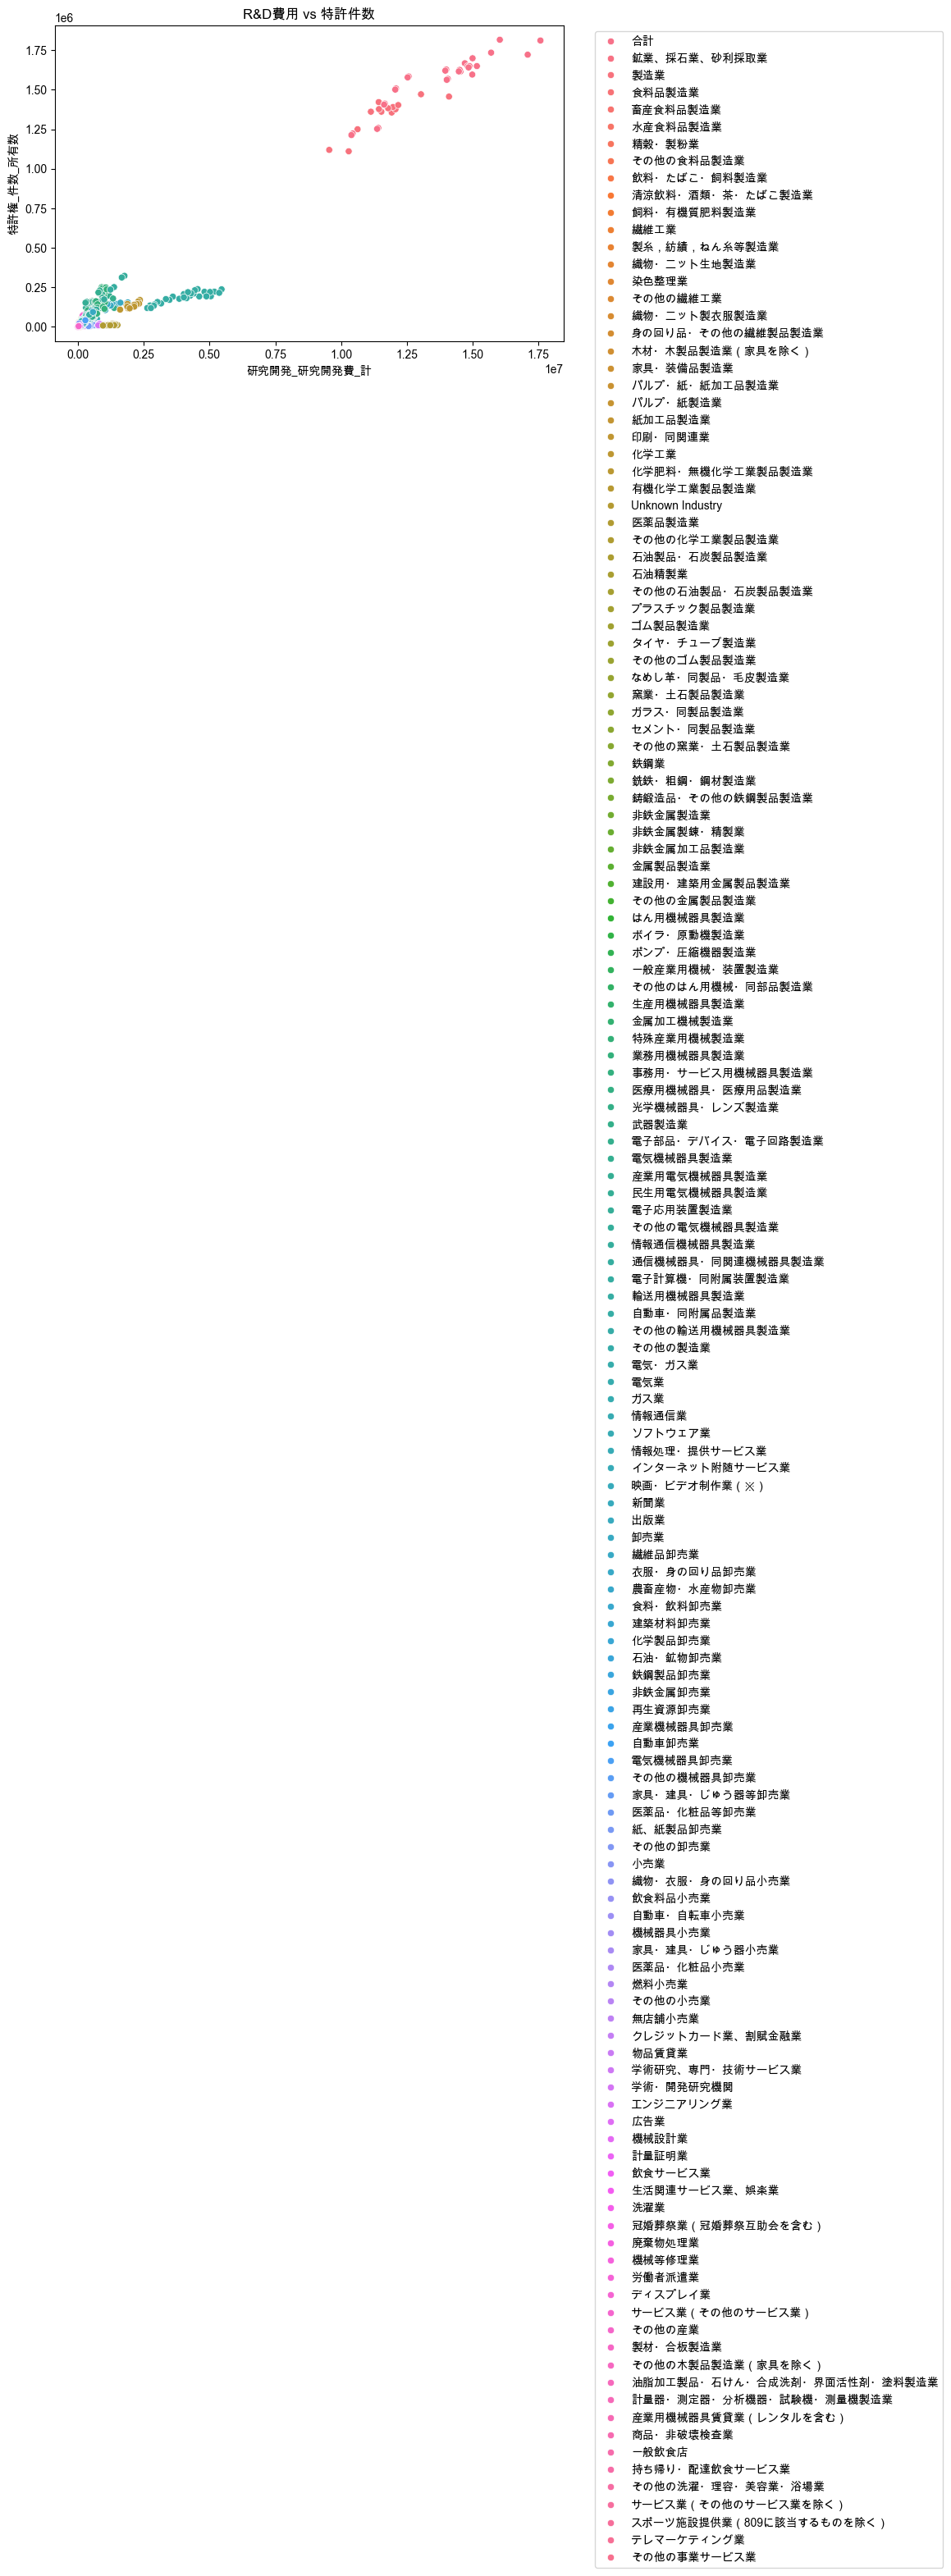

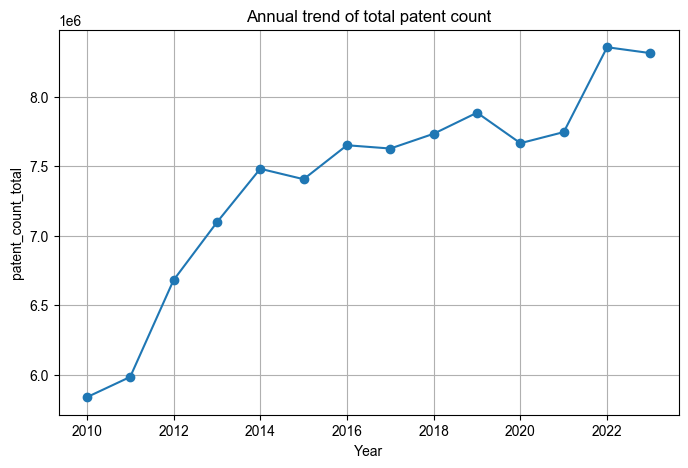

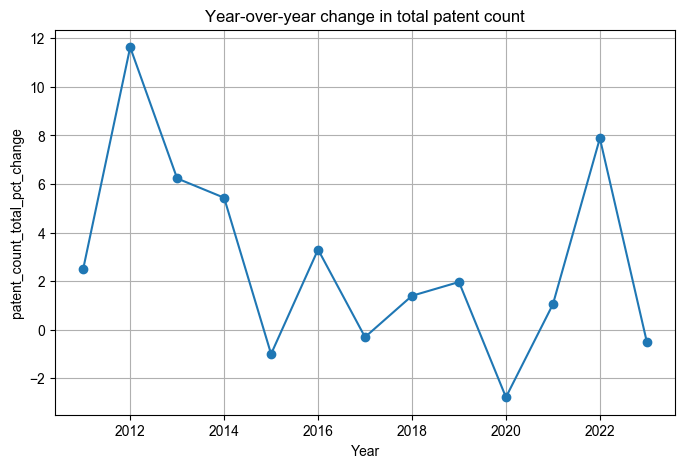

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.font_manager import FontProperties
# 自分のパソコンにインストールされている日本語フォントを指定してください
# For MacOS
fp = FontProperties(fname = '/Library/Fonts/Arial Unicode.ttf',size = 11)
plt.rc('font', family=fp.get_name())

# Convert industry to string to avoid hue error
expected_df["industry"] = expected_df["industry"].astype(str)
expected_df["industry_id"] = expected_df["industry"].astype(str)

expected_df = expected_df.replace(["", "ｘ", "x", "Ｘ", "***"], np.nan)

# Remove rows with NaN in randd_total or patent_count
expected_df = expected_df.dropna(subset=["randd_total", "patent_count"])
expected_df["patent_count"] = expected_df["patent_count"].astype(int)
expected_df["randd_total"] = expected_df["randd_total"].astype(int)

# Scatter plot: R&D費用 vs 特許件数
plt.figure(figsize=(8, 5))
sns.scatterplot(data=expected_df, x="randd_total", y="patent_count", hue="industry")
plt.xlabel("研究開発_研究開発費_計")
plt.ylabel("特許権_件数_所有数")
plt.title("R&D費用 vs 特許件数")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Time series: 年ごとの特許件数合計
plt.figure(figsize=(8, 5))
yearly_patent = expected_df.groupby("year")["patent_count"].sum()
yearly_patent.plot(marker='o')
plt.xlabel("Year")
plt.ylabel("patent_count_total")
plt.title("Annual trend of total patent count")
plt.grid(True)
plt.show()

# Time series: pct_change
plt.figure(figsize=(8, 5))
yearly_patent_change = yearly_patent.pct_change(1).multiply(100)
yearly_patent_change.plot(marker='o')
plt.xlabel("Year")
plt.ylabel("patent_count_total_pct_change")
plt.title("Year-over-year change in total patent count")
plt.grid(True)
plt.show()